In [12]:
import pandas as pd

triplets = pd.read_csv('result/triplets.csv')
mkw = pd.read_csv('result/merged-triplets-keys.csv')

In [13]:
rep = {}
for i in range(len(mkw)):
    r = mkw.iloc[i]
    rep[r['keyword']] = r['representative']

In [14]:
import networkx as nx

G = nx.DiGraph()

for i in range(len(triplets)):
    r = triplets.iloc[i]
    cause = rep[r['cause'].lower()]
    effect = rep[r['effect'].lower()]
    G.add_node(cause)
    G.add_node(effect)
    G.add_edge(cause, effect, paper=r['category'], description=r['finding_id'])

Number of nodes: 1851
Number of edges: 1075


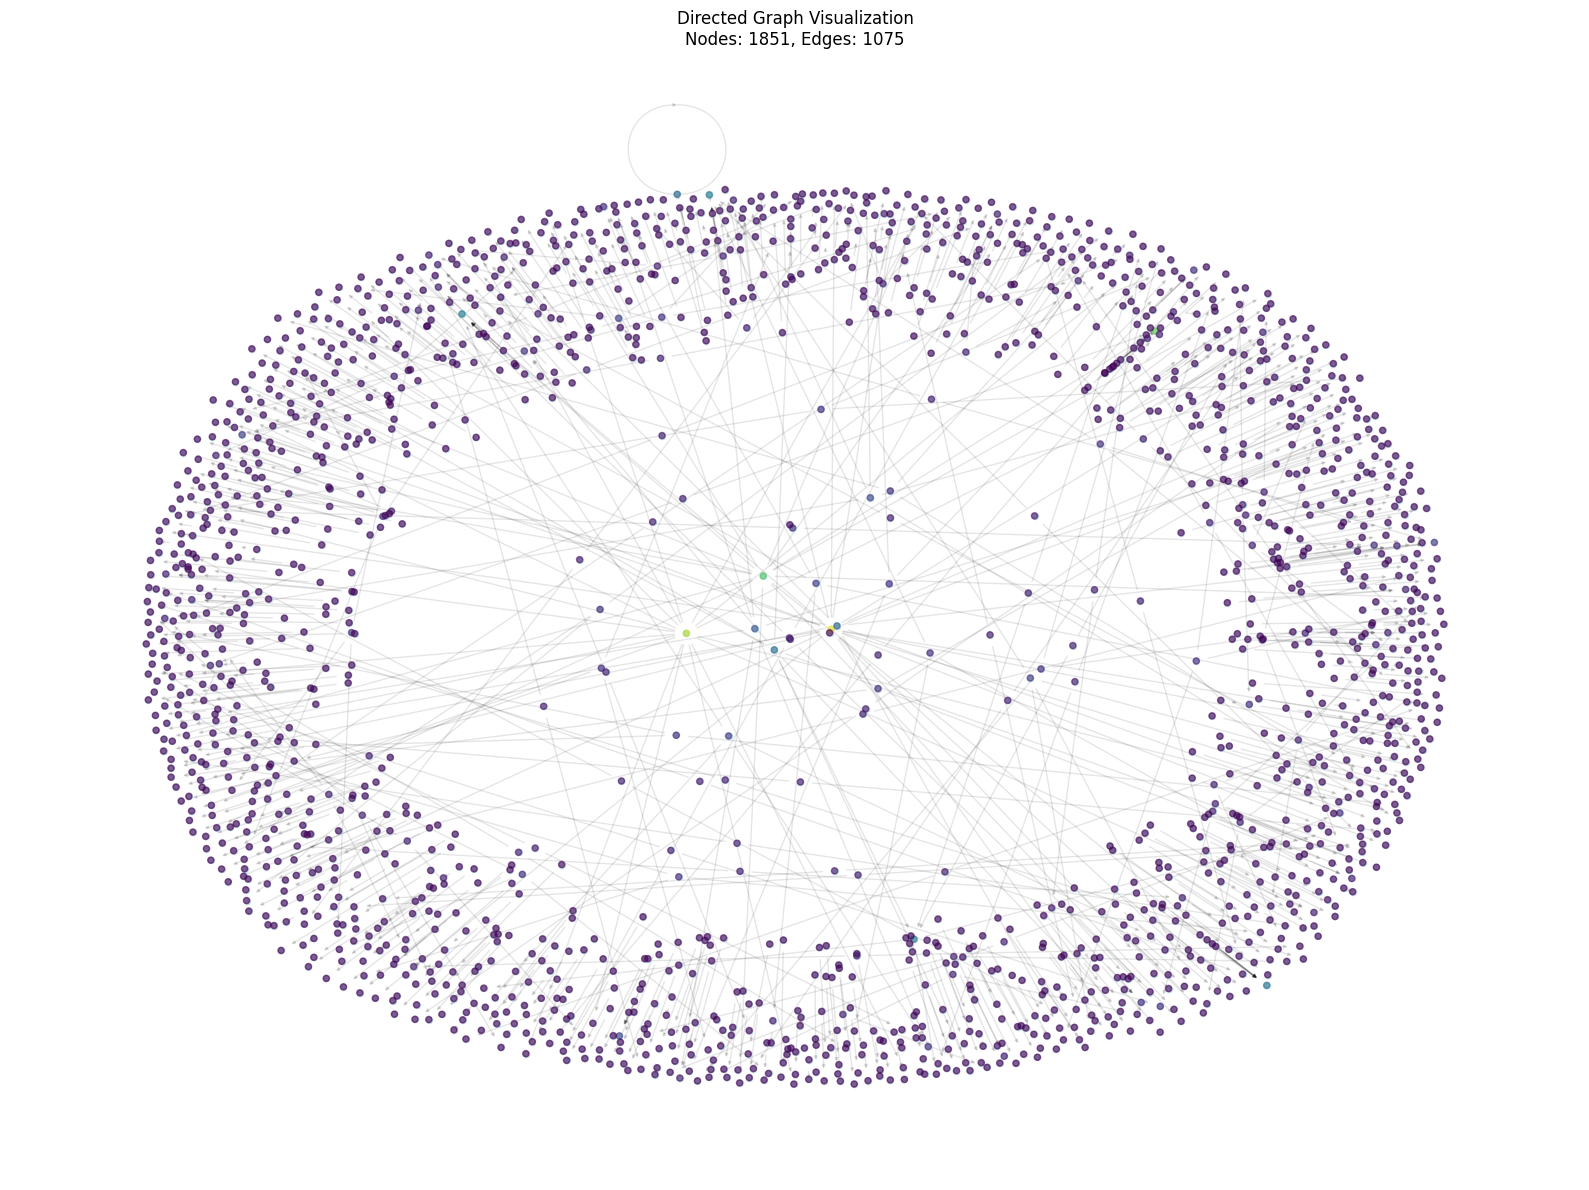

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json

def visualize_large_digraph(G, figsize=(16, 12), node_size=20, 
                          edge_alpha=0.1):
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)

    nx.draw_networkx_edges(G, pos, alpha=edge_alpha, 
                          arrows=True, arrowsize=5)
    
    nx.draw_networkx_nodes(G, pos, 
                          node_size=node_size,
                          node_color='lightblue',
                          alpha=0.6)
    
    degrees = dict(G.degree())
    node_colors = [degrees[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos,
                          node_size=node_size,
                          node_color=node_colors,
                          cmap=plt.cm.viridis,
                          alpha=0.6)

    plt.axis('off')
    
    plt.title(f'Directed Graph Visualization\n'
             f'Nodes: {G.number_of_nodes()}, '
             f'Edges: {G.number_of_edges()}')
    
    plt.tight_layout()
    
    return plt.gcf()
    
# Visualize the graph
visualize_large_digraph(G, 
                       node_size=20,
                       edge_alpha=0.1)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

plt.show()

graph_data = nx.node_link_data(G, edges="edges")
with open('graph-relation.json', 'w') as f:
    f.write(json.dumps(graph_data))